In [1]:
from torch.utils import data
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from PIL import Image
import torch
import os
import random

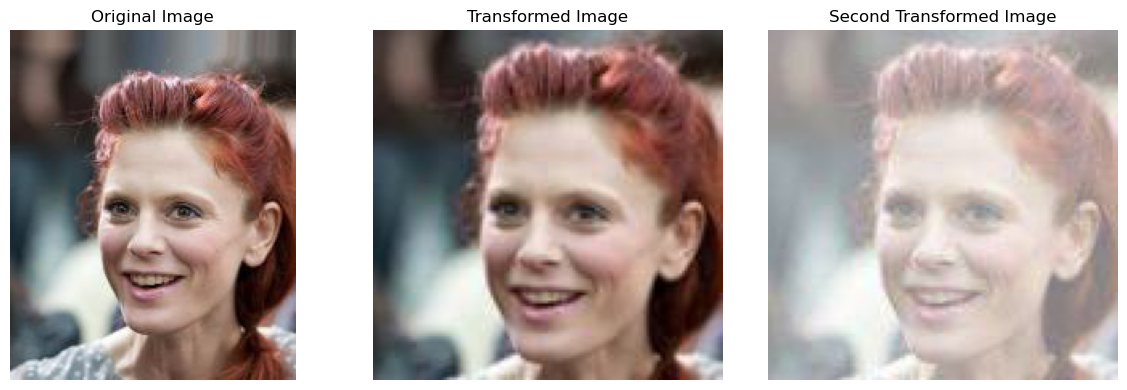

In [10]:
# Load the image
image_path = "000052.jpg"
original_image = Image.open(image_path)

# Define the transformations
transform = T.Compose([
    T.CenterCrop(178),
    T.Resize(128),
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Apply the transformations
transformed_image = transform(original_image)

# Define the denorm function
def denorm(x):
    """Convert the range from [-1, 1] to [0, 1]."""
    out = (x + 1) / 2
    return out.clamp_(0, 1)

result_path = './transformed_000052.jpg'
denormalized_image = denorm(transformed_image.cpu())
#save_image(denormalized_image, result_path)

# Second transformation
transform2 = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# Reload the saved image and apply second transformation
transformed_image = Image.open(result_path)
second_transform_image = transform2(transformed_image)

# Save the second transformed image
result_path = './second_transform_000052.jpg'
denormalized_image = denorm(second_transform_image.cpu())
save_image(denormalized_image, result_path)

second_transform_image = Image.open(result_path)

# Function to unnormalize and display the transformed image
def show_transformed_image(tensor_image):
    unnormalize = T.Normalize(mean=(-1, -1, -1), std=(2, 2, 2))
    tensor_image = unnormalize(tensor_image)
    tensor_image = tensor_image.permute(1, 2, 0).numpy()
    plt.imshow(tensor_image)
    plt.axis("off")
    plt.show()

# Display the original, transformed, and second transformed images
plt.figure(figsize=(12, 4))  # Adjust figure size for three images

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Transformed Image
plt.subplot(1, 3, 2)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis("off")

# Second Transformed Image
plt.subplot(1, 3, 3)
plt.imshow(second_transform_image)
plt.title("Second Transformed Image")
plt.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

